
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: Sahand Setareh

***

This assignment is due on Moodle by **11:59 PM on Friday 3 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>


### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

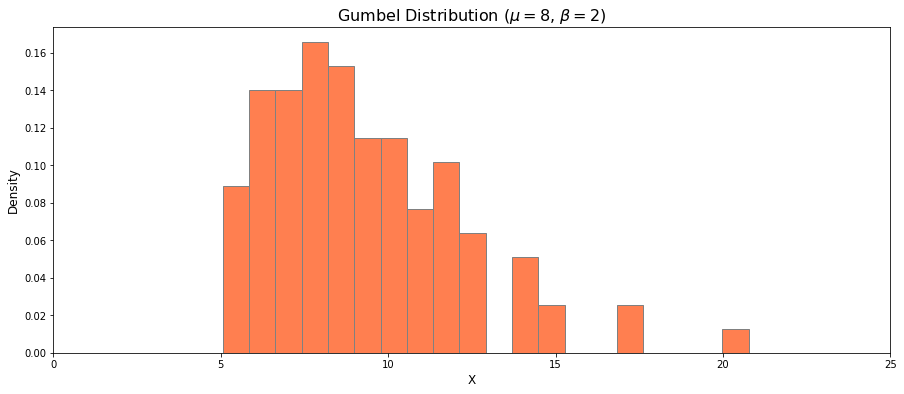

In [2]:
# Parameters
mu = 8
beta = 2
n = 100

# Calculating our Gumbel Distribution using  mu = 8, beta = 2

x_vals = stats.gumbel_r.rvs(loc = mu, scale = beta, size = n) 

#Plotting the Distribution

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))
plt.xlim([0,25])

ax.set_title(r'Gumbel Distribution ($\mu= 8$, $\beta = 2$)', fontsize = 16)
plt.hist(x_vals, color = 'coral', edgecolor = 'gray', bins = 20, density = True)

# Axes titles

ax.set_xlabel('X', fontsize = 12)
ax.set_ylabel('Density', fontsize = 12)

plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

In [3]:
# Euler-Mascheroni Constant
np.euler_gamma

0.5772156649015329

Setting up the calculations:

Given that $ X \sim Gum( \mu = 8, \beta = 2)$, we can determine the theoretical mean and the corresponding variance to be:

$$ E[X] = \mu + \beta \gamma $$

$$E[X] = 8 + 2(0.5772) =  9.154$$

$$Var(X) = \frac{\pi^2}{6}\beta = \frac{\pi^2}{6}(4) = 6.580 $$

Given an empirical mean of 9.314, our 95% confidence interval would be: 

$$ \bar{X} \pm z \cdot \sqrt{\frac{Var(x)}{n}}$$

$$ z = z_{(\frac{0.05}{2})} = 1.96$$
$$ n = 100 $$
$$ Var(x) = 6.580 $$

$$ CI = [ 9.314 - 1.96 \cdot \sqrt{\frac{6.580}{100}}, \sim\sim9.314 + 1.96\sqrt{\frac{6.580}{100}} ] $$

$$ CI = [8.81, \sim\sim 9.82] $$

In [4]:
z = stats.norm.ppf(1 - (0.05 / 2))
z

1.959963984540054

In [5]:
gamma = np.euler_gamma

# Theoretical Data 
theo_mean = mu + (beta * gamma)
theo_var = ((np.pi * beta)**2) / 6

# Empirical Data 
emp_mean = np.mean(x_vals)
emp_var = np.var(x_vals)

print("Theoretical mean: " + str(theo_mean))
print("Theoretical Variance: " + str(theo_var))
print("Empirical mean: " + str(emp_mean))
print("Empirical Variance: " + str(emp_var))

Theoretical mean: 9.154431329803066
Theoretical Variance: 6.579736267392906
Empirical mean: 9.314330052796514
Empirical Variance: 8.33744363033064


**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

(i): It is incorrect to assume that the Confidence Interval we determined represents a particular interval to which the true mean falls within, and it is incorrect to attribute a 95% chance that the true mean falls within this range. This situation is incorrect. 


(ii): Per the definition of a 95% Confidence Interval, if you observe a set of confidence intervals, than you should expec that the 95% of these intervals will contain the true mean and about 5% to not. Therefore, this situation is correct. 


(iii): Per the definition of a confidence interval, we know that they are concerned with sampling the mean of a distribution. It is incorrect to assume that there is anything particularly revealing about a specific element sampled from the population in this specific confidence interval, therefore this situation is incorrect also. 

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

The proportion of confidence intervals that successsfully cover the true mean: 0.65


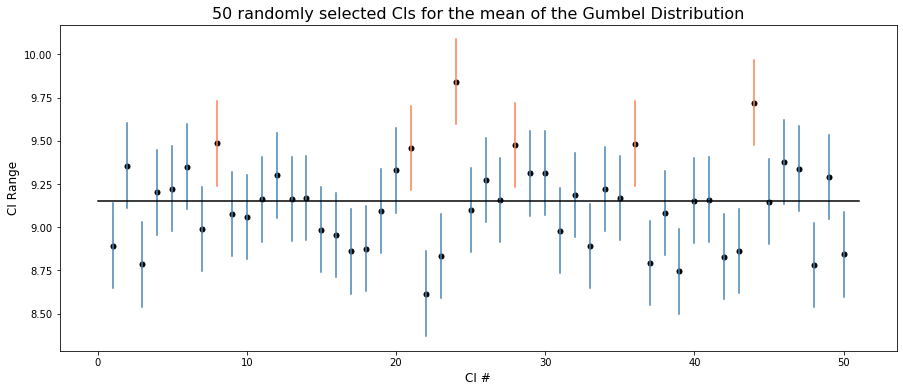

In [6]:
def confidence_intervals(m=500, n=100):
    
    mu = 8
    beta = 2
    
    # True Mean
    tm = mu + beta * gamma
    
    # Variance
    var = (np.pi * beta)**2 / 6
    
    # Populate zeroes in our CIs to determine values later
    cis = np.zeros((m, 2))
    
    # Z critical value
    z = stats.norm.ppf(1 - (1 - 0.66) / 2)  
    
    # Number of CIs that cover the true mean
    counter = 0
    
    # Standard Deviation
    std_dev = np.sqrt(var / n)

    for i in range(m):
        gumbel = stats.gumbel_r.rvs(loc = mu, scale = beta, size = n)
        mean = np.mean(gumbel) 
        
        # Lower and Upper values of CI
        l = mean - z * std_dev
        u = mean + z * std_dev
        
        cis[i, 0] = l
        cis[i, 1] = u 
        
        # If the lower and upper values of CI cover the true mean, increment counter by 1
        if (l <= tm) and (tm <= u):
            counter += 1
            
    # Plotting
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))
    
    ax.set_title("50 randomly selected CIs for the mean of the Gumbel Distribution", fontsize = 16)
    ax.set_xlabel("CI #", fontsize = 12)
    ax.set_ylabel("CI Range", fontsize = 12)
    
    # Randomly choose 50 of the 500 sample means, without replacing each when chosen
    
    for i, choice in enumerate(np.random.choice(range(m), size = 50, replace = False)):
        
        l, u = cis[choice, :]
        
        # If the CI includes the True Mean, color the interval steelblue. Else, color the interval coral
        
        if (l <= tm):
            color = "steelblue"
        elif (tm <= u):
            color = "coral"
            
        # Plotting the CIs using the given colors we specified earlier
        plt.plot([i + 1, i + 1], [u, l], color = color)
        
        # Plotting the sample means
        plt.scatter([i + 1], (u + l) / 2, s = 25, color = "black")
        
    # Plotting the True Mean as a line to reference
    plt.plot([0, 51], [tm, tm], color = "black")
    
    print("The proportion of confidence intervals that successsfully cover the true mean: " + str(counter / m))

# Function Call
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

A 66% confidence interval like the one we were given should include the true mean 66% of the time, and we can see from our 500 confidence intervals that about 65% (0.65) covered the true mean. Seeing how close this is to 66% (what we expect), I'd say that the proportion of confidence intervals covering the true mean of the distribution agrees with the theory described in class. 

---


### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

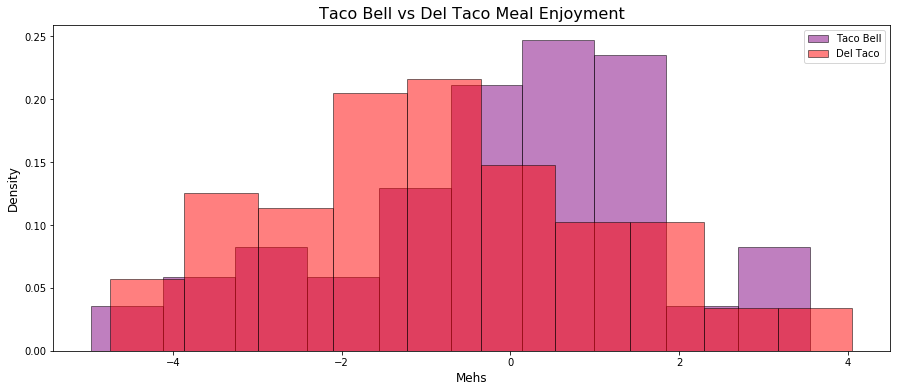

In [7]:
file_path = '/Users/sahandsetareh/Spring 2020/CSCI 3022/Data/taco_time.csv'
df = pd.read_csv(file_path)

# Reading in each column of the DataFrame with the particular restaurant we want as seperate DataFrames

tb = df["Taco Bell"]
dt = df["Del Taco"]

# Plotting 

fig, ax = plt.subplots(figsize=(15,6))

plt.title("Taco Bell vs Del Taco Meal Enjoyment", fontsize = 16)
plt.xlabel("Mehs", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.hist(df["Taco Bell"], density = True, edgecolor = "black", color = "purple", alpha = 0.5, label = "Taco Bell")
plt.hist(df["Del Taco"], density = True, edgecolor = "black", color = "red", alpha = 0.5, label = "Del Taco")
plt.legend();
plt.show()

From the above histogram, we can conclude that meals at Taco Bell are more enjoyable, and so I hypothesize that the mean enjoyment of meals at Taco Bell is higher than the mean enjoyment of meals at Del Taco.

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

$ n = 100, z_{\frac{0.05}{2}} = 1.96$

95% Confidence Interval for Taco Bell Meal enjoyment:

$[\bar{X} - 1.96\frac{s}{10},\sim\sim \bar{X} + 1.96\frac{s}{10}] = [-0.48, \sim\sim0.26] $

95% Confidence Interval for Del Taco Meal enjoyment:

$[\bar{X} - 1.96\frac{s}{10},\sim\sim \bar{X} + 1.96\frac{s}{10}] = [-1.2, \sim\sim-0.46] $

In [8]:
# Both the Taco Bell and Del Taco DataFrames have sample numbers of 100, so n = 100 here

n = tb.count()
z = stats.norm.ppf(1 - (0.05) / 2)

# n and z

print("n = " + str(n))
print("Z (Critical Value): " + str(z))

# Taco Bell Info

tb_mean = tb.mean()
s_tb = np.sqrt(np.var(tb, ddof = 1))

print(" ")
print("Mean (Taco Bell): " + str(tb_mean))
print("Standard dev (Taco Bell): " + str(s_tb))

# Del Taco Info

dt_mean = dt.mean()
s_dt = np.sqrt(np.var(dt, ddof = 1))

print(" ")
print("Mean (Del Taco): " + str(dt_mean))
print("Standard dev (Del Taco): " + str(s_dt))
print(" ")

# Taco Bell CI

tb_ci = [tb_mean - z * s_tb / 10, tb_mean + z * s_tb / 10]
    
# Del Taco CI

dt_ci = [dt_mean - z * s_dt / 10, dt_mean + z * s_dt / 10]
    
print("95% Confidence Interval (Taco Bell): " + str(tb_ci))
print()
print("95% Confidence Interval (Del Taco): " + str(dt_ci))

n = 100
Z (Critical Value): 1.959963984540054
 
Mean (Taco Bell): -0.11369182761473999
Standard dev (Taco Bell): 1.8825017217657933
 
Mean (Del Taco): -0.8343471961220464
Standard dev (Del Taco): 1.9096501965979527
 
95% Confidence Interval (Taco Bell): [-0.4826553851642997, 0.25527172993481967]

95% Confidence Interval (Del Taco): [-1.2086317569622285, -0.46006263528186436]


**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

Let $ \bar{X} = \bar{X_{TB}} - \bar{X_{DT}}$

$n = 100, z = 1.96$

Our 95% confidence interval: $ \bar{X} \pm z \sqrt{\frac{s_{TB}^2}{10} + \frac{s_{DT}^2}{10}} = [0.195 ,\sim\sim 1.236 ]$

In [9]:
# New Mean and S 
mean = tb_mean - dt_mean
s = np.sqrt(s_tb**2 + s_dt**2)

# 95% confidence interval for the difference between the mean enjoyment of the two restaurants
diff_ci = [mean - z * s / 10, mean + z * s / 10]

print("Confidence Interval (Taco Bell) - Confidence Interval (Del Taco) = " + str(diff_ci))

Confidence Interval (Taco Bell) - Confidence Interval (Del Taco) = [0.19508611590308955, 1.2462246211115233]


**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

This confidence interval does not include the value of zero. We can confirm our hypothesis from part A with a 95% confidence interval that Taco Bell meals are more enjoyable.

---


### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [10]:
dfMPG = pd.read_csv("/Users/sahandsetareh/Spring 2020/CSCI 3022/Data/auto-mpg.data", sep = '\s+', header = None) # TODO - need extra arguments to read correctly

# Naming the columns per each column's metric data

dfMPG.columns = ['mpg', 
                 'Cylinders', 
                 'Displacement',
                 'Horsepower',
                 'Weight',
                 'Acceleration', 
                 'Model Year', 
                 'Origin', 
                 'Model Name']

# Replacing question marks with NA, then dropping them

dfMPG = dfMPG.replace({'?' : np.nan})
dfMPG.dropna()
dfMPG

,mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Model Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

In [11]:
z = stats.norm.ppf(1 - 0.5 * 0.1)
n = len(dfMPG)

# Mean and Standard Dev

mean = dfMPG["mpg"].mean()
std_dev = dfMPG["mpg"].std(ddof = 1) / np.sqrt(n)

# Calculating the CI

ci = [mean - z * std_dev, mean + z * std_dev]
ci

[22.87015228677714, 24.158993441866087]

Our 90% confidence interval determined above is higher than 20 mpg, so we can indeed conclude that the mean gas mileage is higher than 20 mpg. 

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

$ \mu_1 $ is the true mean gas mileage for 4 or 6 cylinder vehicles

$ \mu_2 $ is the true mean gas mileage for 8 cylinder vehicles

Sample means of these sets will be denoted $\bar{x}_1$ and $\bar{x}_2$

Standard deviation of these sets will be denoted $s_1$ and $s_2$

Testing the following hypothesis:

$H_0 = \mu_1 - \mu_2 = 10$, $ H_1 = \mu_1 - \mu_2 > 10$

Test statistic: $ Z = \frac{(\bar{x}_1 - \bar{x}_2 - 10)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

Using rejection regions, we can conduct the test, rejecting the null hypothesis if $Z > z_{0.01} = 2.33 $

In [12]:
# Sample Number
n1 = np.sum(dfMPG.Cylinders == 4) + np.sum(dfMPG.Cylinders == 6)
n2 = np.sum(dfMPG.Cylinders == 8)

# Sample Mean
mean1 = dfMPG.loc[(dfMPG.Cylinders == 4) | (dfMPG.Cylinders == 6), "mpg"].mean()
mean2 = dfMPG.loc[dfMPG.Cylinders == 8, "mpg"].mean()

# Sample Variance
var1 = dfMPG.loc[(dfMPG.Cylinders == 4) | (dfMPG.Cylinders == 6), "mpg"].var() / len(dfMPG.loc[(dfMPG.Cylinders == 4) | (dfMPG.Cylinders == 6), "mpg"])
var2 = dfMPG.loc[dfMPG.Cylinders == 8, "mpg"].var() / len(dfMPG.loc[dfMPG.Cylinders == 8, "mpg"])

# Error of Standard Deviation
std_err = np.sqrt(var1 + var2)

# Test Statistic (Z) and Critical Value z

test_stat = (mean1 - mean2 - 10) / std_err
z = stats.norm.ppf(1 - 0.01)

print("Critical value: " + str(z))
print("Test statistic: " + str(test_stat))

Critical value: 2.3263478740408408
Test statistic: 3.3228564373203993


Because we found a test statistic Z that does not fall within the range of our rejection region, we reject the null hypothesis representing that the mean gas mileage for 4 or 6 cylinder vehicles is indeed 10 miles per gallon greater than that of 8 cylinder vehicles. 

---


### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

We would rather have a low Type II error rate. This is because we hypothesize that a certain carbon fiber used in the path is not safe to run on, then we would scrap that sample (reject). However, this means we would also scrap some carbon fiber that is strong enough for the hedgehogs to safely traverse the corkscrew path, but this is a minute trade off and worthwhile considering we will savce many lives by proceeding this way. 

**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

Observing the 95% Confidence Intervals produced by Amy, we see that 931 have turned out to actually capture the true population mean. We expect 95% of the total number of intervals to do so. Therefore, can determine the total number of Confidence Intervals:

$$ 931 * x = 0.95 $$

$$ \frac{931}{0.95} = x = 980 $$

So, we would expect her to have 980 total confidence intervals. 

In [13]:
totalCount = 931 / 0.95
print("Total number of CIs: " + str(totalCount))

Total number of CIs: 980.0


**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

We know that a 99% confidence interval will cover the true mean 99% of the time (think of the interval as something tangible like a basketball hoop, and we're trying to throw tennis balls into it. 99% CI would mean 99% of tennis balls make it into the hoop), so it must be a wider hoop than a 95% CI because a 95% confidence interval misses the true mean more than it's 99% counterpart, making it a smaller (narrower) hoop. 

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

Null and alternative hypothesis:

$H_1: p_{long-ear} - p_{pygmy} > 0.1$

By Central Limit Theorem:

$\hat{p_{long-ear}} - \hat{p_{pygmy}} \sim N(p_{long-ear} - p_{pygmy}, \frac{p_{long-ear}}{n_{long-ear}} + \frac{p_{pygmy}}{n_{pygmy}})$

Assume $H_0$ and Apply Box-Muller: 

$ Z \sim \frac{\hat{p_{long-ear}} - \hat{p_{pygmy}} - 0.1}{\sqrt{\frac{p_{long-ear}}{n_{long-ear}} + \frac{p_{pygmy}}{n_{pygmy}}}} $

Using the given metrics, we can determine:

$z = \frac{\frac{51}{58} - \frac{49}{73} - 0.1}{\sqrt{\frac{\frac{51}{58}(1 - \frac{51}{58})}{58}} + \frac{\frac{49}{73}(1 - \frac{49}{73})}{73}} $

In [14]:
# Determining z & P-value

num = 51 / 58 - 49 / 73 - 0.1
den = np.sqrt(51 / 58 * (1 - 51 / 58) / 58 + 49 / 73 * (1 - 49 / 73) / 73)

z = num / den
p = 1 - stats.norm.cdf(z)

print("z = " + str(z))
print("p-value: " + str(p))

z = 1.5514666184411574
p-value: 0.060394950555197724


$p > 0.05$, we fail to reject the null hypothesis

**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [15]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

In [16]:
n = len(toughness)
var = np.var(toughness, ddof = 1)

# Lower and Upper values for 90% CI
l = np.sqrt((n - 1) * var / stats.chi2.ppf(1 - 0.1 / 2, n - 1))
u = np.sqrt((n - 1) * var / stats.chi2.ppf(0.1 / 2, n - 1))

print("Standard Deviation: " + str(np.sqrt(var)))
print("90% Confidence Interval: " + str([l,u]))

Standard Deviation: 1.7519621119294686
90% Confidence Interval: [1.294838689983604, 2.7910017777609895]


---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [17]:
# Reading in csv file as a pd DataFrame
file_path = '/Users/sahandsetareh/Spring 2020/CSCI 3022/Data/sealevel_keywest.csv'
df = pd.read_csv(file_path, header = None)

# Renaming the Columns to Year, Month, Day, Sea Level
df.rename(columns = {0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'Sea Level'}, inplace = True)

# Displaying first 7 rows from updated DataFrame
df.head(7)

,Year,Month,Day,Sea Level
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474
5,1913,1,25,1442
6,1913,1,26,1467


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

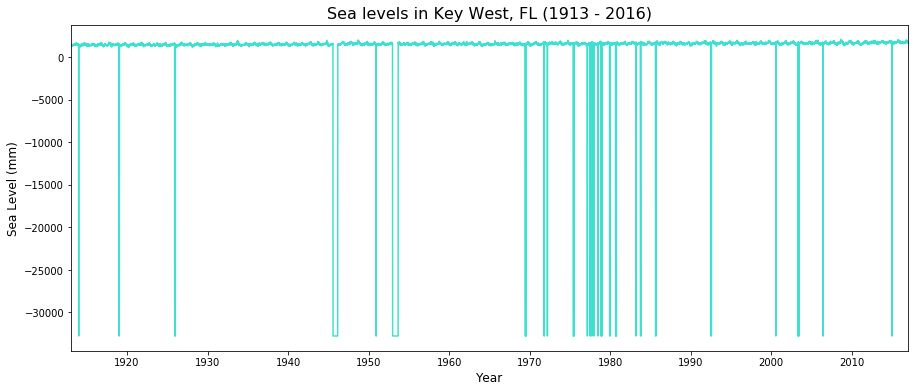

In [18]:
# 
index = df.index[(df["Month"] == 1) & (df["Day"] == 2) & (df["Year"] % 10 == 0)]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))

df["Sea Level"].plot(color = 'turquoise')

ax.set_xticks(index)
ax.set_xticklabels(df.loc[index, "Year"])
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Sea Level (mm)', fontsize = 12)
ax.set_title('Sea levels in Key West, FL (1913 - 2016)', fontsize = 16);

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

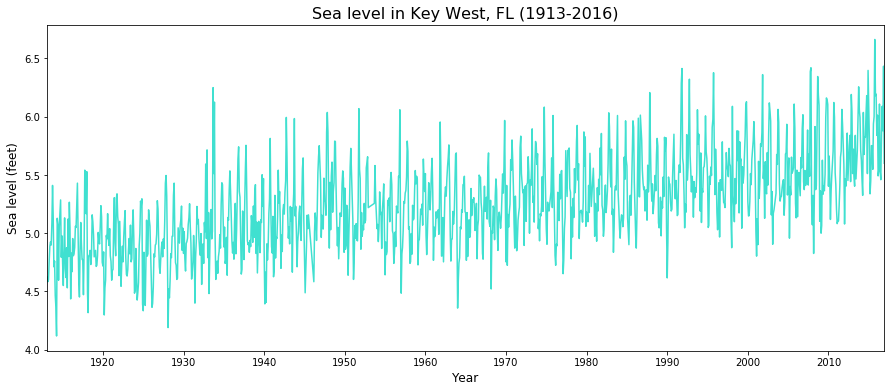

In [19]:
new_df = df.copy()

# Finding all the spikes we want to omit from our new plot

tooLow = new_df.loc[new_df["Sea Level"] < -5000, "Sea Level"].median()

# Change these values to NA, then drop them

new_df.loc[new_df["Sea Level"] == tooLow, "Sea Level"] = np.nan
new_df.dropna(subset = ["Sea Level"], inplace = True)

# Grab only the 2nd day of each month

day_2month = new_df.index[new_df["Day"] == 2]
new_df = new_df.loc[day_2month, :]
new_df["Sea Level"] = new_df["Sea Level"]*0.001 / .3048

# Plotting

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,6))
new_df["Sea Level"].plot(color = "turquoise")

ax.set_xticks(index)
ax.set_xticklabels(new_df.loc[index, "Year"])
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Sea level (feet)', fontsize = 12)
ax.set_title('Sea level in Key West, FL (1913-2016)', fontsize = 16)

plt.show()

**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 

I will use Confidence Intervals

In [20]:
# Helper Function

def helper(alpha, start_year, years_len, presentdf):
    
    # Create a copy of cleaned DataFrame
    dft = new_df.copy()
    
    # z critical value
    z = stats.norm.ppf(1 - alpha / 2)    
    
    # 1960 - 1999 per the parameters we will pass
    dft = dft.loc[(dft["Year"] >= start_year) & (dft["Year"] <= (start_year + years_len)), "Sea Level"]

    std_err = np.sqrt((presentdf.var(ddof = 1) / dft.count()) + (dft.var(ddof = 1) / dft.count()))
    mean = presentdf.mean() - dft.mean()
    
    # Lower and Upper values of CI
    l = mean - z * std_err
    u = mean + z * std_err
    
    return l, u

presentdf = new_df.copy()

# 2000 to 2010
presentdf = presentdf.loc[(presentdf["Year"] >= 2000) & (presentdf["Year"] <= 2010), "Sea Level"]

print("[Year, (CI)]")

for year in range(1960, 1999): 
    print([year, helper(0.01, year, 10, presentdf)])

[Year, (CI)]
[1960, (0.23926252063009792, 0.44191315035883905)]
[1961, (0.24279813633605535, 0.4468426024736059)]
[1962, (0.23057210085567986, 0.4334229886983056)]
[1963, (0.20398303592712613, 0.4086205767981009)]
[1964, (0.19112691944222976, 0.3966324705665601)]
[1965, (0.1664788464177573, 0.3703581187290435)]
[1966, (0.1589828383548143, 0.36386604972023007)]
[1967, (0.14917175506906521, 0.3589928311890549)]
[1968, (0.13523265646350593, 0.3464801581410698)]
[1969, (0.11568012815702888, 0.32661134458403074)]
[1970, (0.11239737158379687, 0.32220988005965207)]
[1971, (0.10952377672165677, 0.3175917932717652)]
[1972, (0.0935664377179099, 0.30156740164538315)]
[1973, (0.09021860123697763, 0.3012222942324892)]
[1974, (0.11303809284665309, 0.3240221002106173)]
[1975, (0.10895566192557492, 0.321305381025456)]
[1976, (0.09395260037763858, 0.30800125262567984)]
[1977, (0.06620280411895425, 0.27927926927413876)]
[1978, (0.05727596817447364, 0.2653161115219609)]
[1979, (0.0592464674130781, 0.2668

Here we can observe confidence intervals for multiple years spanning multiple decades. From this, we can see that the 10 years of 1984 - 1994 do not demonstrate data that leads us to observe a large difference in the mean quantities for the sea levels until the decade of 2000 - 2010. 